# 3.4 选择两个UCI数据集，比较10折交叉验证法和留一法所估计出的对率回归的错误率
> 数据集链接：https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 数据准备

In [2]:
df=pd.read_csv('transfusion.data')
data=np.array(df)
data

array([[    2,    50, 12500,    98,     1],
       [    0,    13,  3250,    28,     1],
       [    1,    16,  4000,    35,     1],
       ...,
       [   23,     3,   750,    62,     0],
       [   39,     1,   250,    39,     0],
       [   72,     1,   250,    72,     0]], dtype=int64)

## 对数几率回归

In [3]:
def getDataSet(dataSet):
    """
    get watermelon data set UCI.
    :return:(feature array, label array)
    """
    # insert number 1 before colummn 0.
    # e.g: dataSet[0]=[1,0.697,0.460,1]
    dataSet = np.insert(dataSet,0,
                        np.ones(dataSet.shape[0]),
                        axis=1)
    dataArr = dataSet[:,:-1]
    labelArr = dataSet[:,-1]
    return dataArr, labelArr

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def gradDescent(dataArr, labelArr,alpha,T):
    """
    calculate logistic parameters by gradient descent method.
    :param dataArr: input data set with shape(m,n)
    :param labelArr: the label of data set with shape(m,1)
    :param alpha: step length (learning rate)
    :param T: iteration
    :return: parameters of gradient descent method.
    """
    m,n = dataArr.shape
    labelArr = labelArr.reshape(-1,1)
    errList=[]

    beta=np.ones((n,1))
    for t in range(T):
        py1=sigmoid(np.dot(dataArr,beta))
        dBetaMat=-dataArr*(labelArr-py1)
        # shape (1,n)
        dBeta=np.sum(dBetaMat,axis=0,keepdims=True)
        beta-=alpha*dBeta.T

        #test code
        pre=predict(beta,dataArr)
        errorRate = cntErrRate(pre,labelArr)
        errList.append(errorRate)

    return beta,errList

In [5]:
def predict(beta,dataArr):
    preArr=sigmoid(np.dot(dataArr,beta))
    preArr[preArr>0.5]=1
    preArr[preArr<0.5]=0

    return preArr

In [6]:
def cntErrRate(preLabel,label):
    """
    calculate error rate of predicted label by cnt method.
    :param preLabel: predict label
    :param label: real label
    :return: error rate
    """
    m=len(preLabel)
    cnt=0.0

    for i in range(m):
        if preLabel[i]!=label[i]:
            cnt+=1.0
    return cnt/float(m)

gradient descent error rate is: 0.23128342245989306


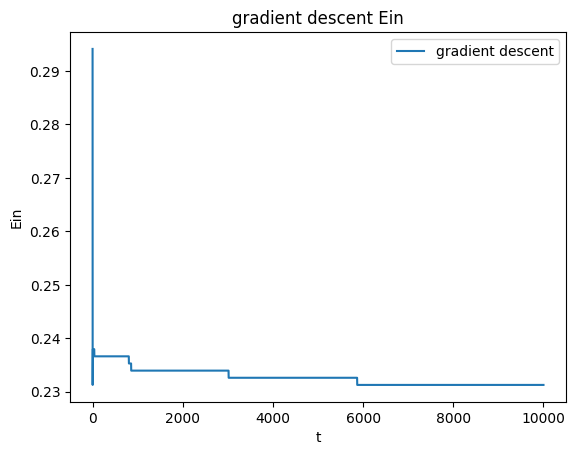

In [7]:
dataArr, labelArr = getDataSet(data)
dataArr = (dataArr - dataArr.mean()) / dataArr.std()

# gradien descent
T=10000
learningRate=0.001
betaGrad, errGrad=gradDescent(dataArr, labelArr,learningRate,T)
print("gradient descent error rate is:",errGrad[-1])

 # plot gradient descent Ein
plt.figure()
x1=np.linspace(1,T+1,T)
plt.plot(x1,errGrad,label='gradient descent')
plt.xlabel("t")
plt.ylabel("Ein")
plt.title("gradient descent Ein")
plt.legend()

plt.show()

## 十折交叉验证

In [8]:
# 随机打乱数据
np.random.seed(123)
rand_data=np.random.permutation(data)

# 分离label
X_v,y_v=getDataSet(rand_data)
X_v = (X_v - X_v.mean()) / X_v.std()

# 定义accuracy
def accuracy(pre,y):
    sum=0
    for i in range(len(y)):
        if pre[i]==y[i]:
            sum+=1
    return sum/len(pre)

# 10折交叉验证
def data_split_test(seq,X,y,show=1):
    sum1=0
    sum2=0
    ran=int(X.shape[0]/seq)
    for i in range(seq):
        rest_X=X[i*ran:(i+1)*ran]
        rest_y=y[i*ran:(i+1)*ran]
        temp_X=X[list(range(0,i*ran))+list(range((i+1)*ran,X.shape[0]))]
        temp_y=y[list(range(0,i*ran))+list(range((i+1)*ran,y.shape[0]))]
        beta,errGrad=gradDescent(temp_X,temp_y,0.001,1000)
        pre_train=predict(beta,temp_X)
        sum1+=accuracy(pre_train,temp_y)
        pre_test=predict(beta,rest_X)
        sum2+=accuracy(pre_test,rest_y)
        if(show):
            print("第{}折".format(i+1))
            print("gradient descent error rate is:",errGrad[-1])
            print("Train accuracy: {}%".format(100*accuracy(pre_train,temp_y)))
            print("Test accuracy: {}%".format(100*accuracy(pre_test,rest_y)))
    return sum1/seq,sum2/seq
    

In [9]:
acc_train,acc_test=data_split_test(10,X_v,y_v,1)
print("\n十折交叉验证后")
print("Average Train accuracy is {}%".format(100*acc_train))
print("Average Test accuracy is {}%".format(100*acc_test))

第1折
gradient descent error rate is: 0.22700296735905046
Train accuracy: 77.29970326409496%
Test accuracy: 67.56756756756756%
第2折
gradient descent error rate is: 0.23887240356083086
Train accuracy: 76.11275964391692%
Test accuracy: 78.37837837837837%
第3折
gradient descent error rate is: 0.23738872403560832
Train accuracy: 76.26112759643917%
Test accuracy: 77.02702702702703%
第4折
gradient descent error rate is: 0.2314540059347181
Train accuracy: 76.8545994065282%
Test accuracy: 71.62162162162163%
第5折
gradient descent error rate is: 0.23590504451038577
Train accuracy: 76.40949554896143%
Test accuracy: 79.72972972972973%
第6折
gradient descent error rate is: 0.23738872403560832
Train accuracy: 76.26112759643917%
Test accuracy: 79.72972972972973%
第7折
gradient descent error rate is: 0.23590504451038577
Train accuracy: 76.40949554896143%
Test accuracy: 78.37837837837837%
第8折
gradient descent error rate is: 0.23590504451038577
Train accuracy: 76.40949554896143%
Test accuracy: 81.08108108108108%
第9

## 留一法

In [10]:
acc_train1,acc_test1 = data_split_test(X_v.shape[0], X_v, y_v,show=0)
print("\n留一法")
print("Total train accuracy is {}%".format(acc_train1 * 100))
print("Total test accuracy is {}%".format(acc_test1*100))


留一法
Total train accuracy is 76.57850653952697%
Total test accuracy is 76.33689839572193%
